# Final Project
## Gyroscope 
### Guangpeng (Carl) Xu

In [1]:
# first we import python libraries
import numpy as np
import matplotlib.pyplot as plt
import sys

# then import python files which are in the 'codes' folder
sys.path.append('codes')
from fitting import *
from read_data import *

### Experiment I

We first plot the raw data from the 1st experiment. It has a angular acceleration along z axis while the angular velocity alond x and y axit should be zero. Details and physics are discussed in the wiki.

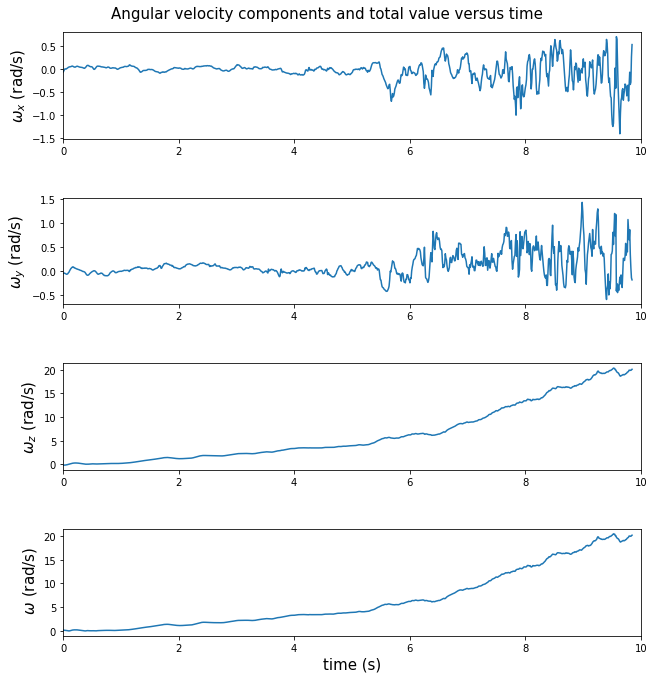

In [2]:
# read data from the csv file
data1 = read_data('data\z_acc.csv')

# assign data values to variables
time1, xdata1, ydata1, zdata1, absdata1 = data1[0:5]

# plot raw data 
plt.figure(figsize=(10,10))

plt.subplot(4,1,1)
plt.plot(time1,xdata1)
plt.ylabel(r'$\omega_x$ (rad/s)',fontsize=15)
plt.xlim(0,10)

plt.subplot(4,1,2)
plt.plot(time1,ydata1)
plt.ylabel(r'$\omega_y$ (rad/s)',fontsize=15)
plt.xlim(0,10)

plt.subplot(4,1,3)
plt.plot(time1,zdata1)
plt.ylabel(r'$\omega_z$ (rad/s)',fontsize=15)
plt.xlim(0,10)

plt.subplot(4,1,4)
plt.plot(time1,absdata1)
plt.ylabel(r' $\omega$ (rad/s)',fontsize=15)
plt.xlim(0,10)

plt.suptitle('Angular velocity components and total value versus time',fontsize=15)
plt.xlabel('time (s)',fontsize=15)

plt.tight_layout(pad=4)


As we can see, the x and y components are close to zero even though there're jitterings starting from time = 5s due to wobbling of my phone. Since the phone rotation is manipulated by my hands, it becomes harder to control it at higher angular velocity, which results in components along x and y directions.

### Fitting

Next we use the algorithms I wrote to fit the data. Notice we expect the x and y components to be a constant(zero); z component is supposed to be linear and the total angular velocity should be linear as z component does.  
+ $\omega_x = 0$
+ $\omega_y = 0$
+ $\omega_z = a_o + a_1 * t$
+ $\omega = a_o + a_1 * t$

In [3]:
# input data to the fitting function
# for x and y, order should be 0 while it's 1 for z and abs value
x1para = fit(time1,xdata1,0)
y1para = fit(time1,ydata1,0)
z1para = fit(time1,zdata1,1)
abs1para = fit(time1,absdata1,1)

In [4]:
# print fitting equations out
print( u'\u03C9_x = %0.4f'%(x1para[0]))
print( u'\u03C9_y = %0.4f'%(y1para[0]))
print( u'\u03C9_z = %0.4f + %0.4f * t' %(z1para[0],z1para[1]))
print( u'\u03C9 = %0.4f + %0.4f * t' %(abs1para[0],abs1para[1]))

ω_x = -0.0523
ω_y = 0.1251
ω_z = -3.4073 + 2.0050 * t
ω = -3.3896 + 2.0037 * t


In [5]:
# get the fitting value array
xfit1 = func(time1,x1para)
yfit1 = func(time1,y1para)
zfit1 = func(time1,z1para)
absfit1 = func(time1,abs1para)


In [6]:
# compute chi square and variance
chi2_x1,var_x1 = chi2(xdata1,np.zeros(time1.shape)+x1para[0],1)
chi2_y1,var_y1 = chi2(ydata1,np.zeros(time1.shape)+y1para[0],1)
chi2_z1,var_z1 = chi2(zdata1,zfit1,2)
chi2_abs1,var_abs1 = chi2(absdata1,absfit1,2)
print(u'The \u03C7^2 of \u03C9_x fitting is: %1.4f while the \u03C7^2/dof is: %1.4f'%(chi2_x1,var_x1))
print(u'The \u03C7^2 of \u03C9_y fitting is: %1.4f while the \u03C7^2/dof is: %1.4f'%(chi2_y1,var_y1))
print(u'The \u03C7^2 of \u03C9_z fitting is: %1.4f while the \u03C7^2/dof is: %1.4f'%(chi2_z1,var_z1))
print(u'The \u03C7^2 of \u03C9 fitting is: %1.4f while the \u03C7^2/dof is: %1.4f'%(chi2_abs1,var_abs1))

The χ^2 of ω_x fitting is: 51.0529 while the χ^2/dof is: 0.0520
The χ^2 of ω_y fitting is: 69.0285 while the χ^2/dof is: 0.0704
The χ^2 of ω_z fitting is: 4364.3145 while the χ^2/dof is: 4.4534
The χ^2 of ω fitting is: 4394.9215 while the χ^2/dof is: 4.4846


### Explanation
Based on the fitting results and $\chi^2$ values, the last two fittings are not very satisfying. Particularly, the shape of the original data is not even linear and one explaination might be the force I apply on the phone is not constant. When the rotation speed is higher the friction is increasing so I might apply a rather larger force which generates an increasing angular acceleration.  

To testify this assumption, I decided to use a second order fitting function to fit the $\omega_z$ component and total $\omega$ data.

In [7]:
# input data to the fitting function
# here the order is changed to 2
z1para_2nd = fit(time1,zdata1,2)
abs1para_2nd = fit(time1,absdata1,2)

# print fitting equations out
print( u'\u03C9_z = %0.4f  %0.4f * t + %0.4f * t ** 2' %(z1para_2nd[0],z1para_2nd[1],z1para_2nd[2]))
print( u'\u03C9 = %0.4f  %0.4f * t + %0.4f * t ** 2' %(abs1para_2nd[0],abs1para_2nd[1],abs1para_2nd[2]))

ω_z = 1.0374  -0.7057 * t + 0.2753 * t ** 2
ω = 1.0777  -0.7208 * t + 0.2767 * t ** 2


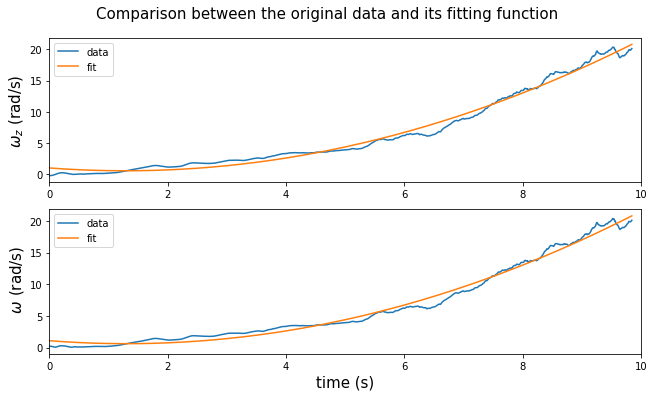

In [8]:
# get the fitting value array
zfit1_2nd = func(time1,z1para_2nd)
absfit1_2nd = func(time1,abs1para_2nd)

# plot the fitting function with original data for comparison
plt.figure(figsize=(10,6))

plt.subplot(2,1,1)
plt.plot(time1,zdata1, label='data')
plt.plot(time1,zfit1_2nd,label='fit')
plt.ylabel(r'$\omega_z$ (rad/s)',fontsize=15)
plt.xlim(0,10)
plt.legend(loc='best')

plt.subplot(2,1,2)
plt.plot(time1,absdata1, label='data')
plt.plot(time1,absfit1_2nd,label='fit')
plt.ylabel(r' $\omega$ (rad/s)',fontsize=15)
plt.xlim(0,10)
plt.legend(loc='best')

plt.suptitle('Comparison between the original data and its fitting function',fontsize=15)
plt.xlabel('time (s)',fontsize=15)


plt.tight_layout(pad=4,h_pad=1)


In [9]:
# compute chi square and variance
chi2_z1_2nd,var_z1_2nd = chi2(zdata1,zfit1_2nd,3)
chi2_abs1_2nd,var_abs1_2nd = chi2(absdata1,absfit1_2nd,3)
print(u'The \u03C7^2 of \u03C9_z fitting is: %1.4f while the \u03C7^2/dof is: %1.4f'%(chi2_z1_2nd,var_z1_2nd))
print(u'The \u03C7^2 of \u03C9 fitting is: %1.4f while the \u03C7^2/dof is: %1.4f'%(chi2_abs1_2nd,var_abs1_2nd))

The χ^2 of ω_z fitting is: 460.8333 while the χ^2/dof is: 0.4707
The χ^2 of ω fitting is: 451.4218 while the χ^2/dof is: 0.4611


### Explanation
For a quadratic fitting function, the $\chi^2$ values are much lower than the previous ones and $\chi^2/dof$ are down to less than one. Admittedly, higher order function will fit the data better however, it might not "fit" the physics of the experiment. Thus, according to the fitting, my phone had an unsteady angular accelerating motion even though I was trying to hold the rotation axis to let it accelerate steadily.

### Experiment II

For the 2nd experiment, the phone is rotating with a constant speed along z axis, while it's also rotating as rigid body around a fixed point. See details in the wiki.  

As we did before, we first plot the raw data. This time we expect the x and y components to be sinusoidal, z component and the total angular velocity to be a constant (see derivation in the wiki). Additionally, because motion itself is hard to operate which results in large "noise" or errors. Hence we have to truncate it and analyze a part of the raw data which makes more sense.

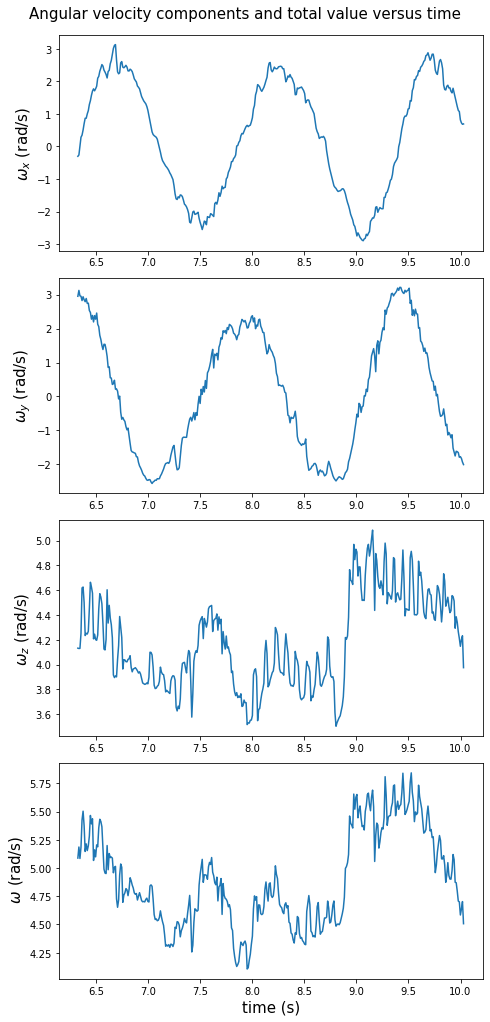

In [10]:
# read data from the csv file
data2 = read_data('data\z_cir.csv')

# assign data values to variables, here we truncate it 
time2, xdata2, ydata2, zdata2, absdata2 = data2[0:5,630:1000]

# plot raw data 
plt.figure(figsize=(8,15))

plt.subplot(4,1,1)
plt.plot(time2,xdata2)
plt.ylabel(r'$\omega_x$ (rad/s)',fontsize=15)

plt.subplot(4,1,2)
plt.plot(time2,ydata2)
plt.ylabel(r'$\omega_y$ (rad/s)',fontsize=15)

plt.subplot(4,1,3)
plt.plot(time2,zdata2)
plt.ylabel(r'$\omega_z$ (rad/s)',fontsize=15)

plt.subplot(4,1,4)
plt.plot(time2,absdata2)
plt.ylabel(r' $\omega$ (rad/s)',fontsize=15)


plt.suptitle('Angular velocity components and total value versus time',fontsize=15)
plt.xlabel('time (s)',fontsize=15)

plt.tight_layout(pad=5,h_pad=1)


As shown above, x and y components do have a sinusoidal shape. Unfortunately, z and total angular velocity have very large noise preventing it to be a constant.

### Fitting

Using the algorithms, we can easily fit $\omega_z$ and $\omega$ as they're constants. For x and y components, I use a degree of 30 polynomial function to form a sinusoidal shape since sinusoidal functions could be expanded as:   
$$sinx = \sum_{n=0}^{\infty} \frac{(-1)^n}{(2n+1)!}x^{2n+1}$$
$$cosx = \sum_{n=0}^{\infty} \frac{(-1)^n}{(2n)!}x^{2n}$$
  
And we expect:
+ $\omega_x = \omega_{pre}sin(\omega_{sp}(t-\phi))$
+ $\omega_y = \omega_{pre}cos(\omega_{sp}(t-\phi))$
+ $\omega_z = \omega_{sp}$
+ $\omega = \sqrt{\omega_{pre}^2+\omega_{sp}^2}$

In [11]:
# input data to the fitting function
x2para = fit(time2,xdata2,30)
y2para = fit(time2,ydata2,30)
z2para = fit(time2,zdata2,0)
abs2para = fit(time2,absdata2,0)

# get the fitting value array
xfit2 = func(time2,x2para)
yfit2 = func(time2,y2para)
zfit2 = func(time2,z2para)
absfit2 = func(time2,abs2para)

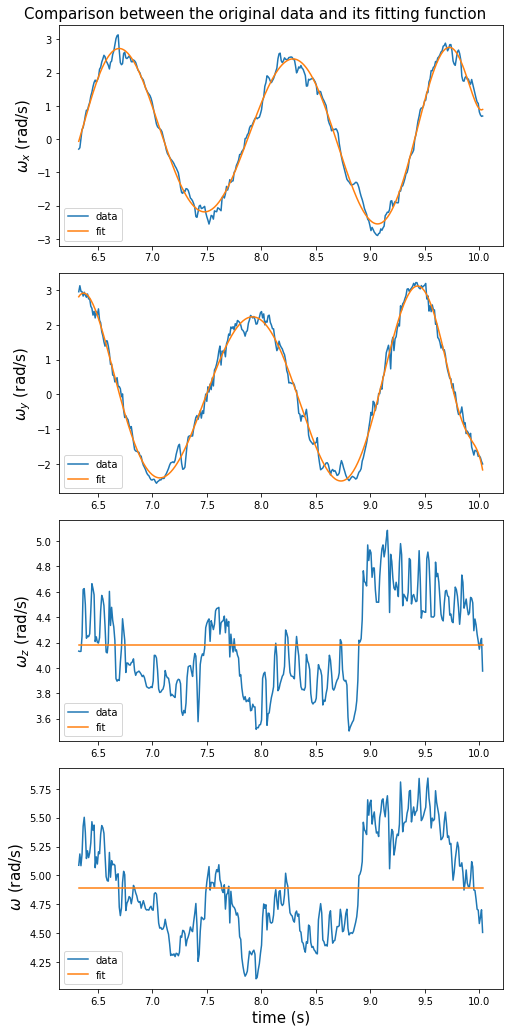

In [12]:
# plot the fitting function with original data for comparison
plt.figure(figsize=(8,15))

plt.subplot(4,1,1)
plt.plot(time2,xdata2, label='data')
plt.plot(time2,xfit2,label='fit')
plt.ylabel(r'$\omega_x$ (rad/s)',fontsize=15)
plt.legend(loc='lower left')

plt.subplot(4,1,2)
plt.plot(time2,ydata2, label='data')
plt.plot(time2,yfit2,label='fit')
plt.ylabel(r'$\omega_y$ (rad/s)',fontsize=15)
plt.legend(loc='lower left')

plt.subplot(4,1,3)
plt.plot(time2,zdata2, label='data')
plt.plot(time2,np.zeros(time2.shape)+zfit2,label='fit')
plt.ylabel(r'$\omega_z$ (rad/s)',fontsize=15)
plt.legend(loc='lower left')

plt.subplot(4,1,4)
plt.plot(time2,absdata2, label='data')
plt.plot(time2,np.zeros(time2.shape)+absfit2,label='fit')
plt.ylabel(r' $\omega$ (rad/s)',fontsize=15)
plt.legend(loc='lower left')

plt.suptitle('Comparison between the original data and its fitting function',fontsize=15)
plt.xlabel('time (s)',fontsize=15)

plt.tight_layout(pad=4,h_pad=1)


In [13]:
# compute chi square and variance
chi2_x2,var_x2 = chi2(xdata2,xfit2,31)
chi2_y2,var_y2 = chi2(ydata2,yfit2,31)
chi2_z2,var_z2 = chi2(zdata2,np.zeros(time2.shape)+zfit2,1)
chi2_abs2,var_abs2 = chi2(absdata2,np.zeros(time2.shape)+absfit2,1)
print(u'The \u03C7^2 of \u03C9_x fitting is: %1.4f while the \u03C7^2/dof is: %1.4f'%(chi2_x2,var_x2))
print(u'The \u03C7^2 of \u03C9_y fitting is: %1.4f while the \u03C7^2/dof is: %1.4f'%(chi2_y2,var_y2))
print(u'The \u03C7^2 of \u03C9_z fitting is: %1.4f while the \u03C7^2/dof is: %1.4f'%(chi2_z2,var_z2))
print(u'The \u03C7^2 of \u03C9 fitting is: %1.4f while the \u03C7^2/dof is: %1.4f'%(chi2_abs2,var_abs2))

The χ^2 of ω_x fitting is: 12.3759 while the χ^2/dof is: 0.0365
The χ^2 of ω_y fitting is: 13.7363 while the χ^2/dof is: 0.0405
The χ^2 of ω_z fitting is: 49.0396 while the χ^2/dof is: 0.1329
The χ^2 of ω fitting is: 64.5562 while the χ^2/dof is: 0.1749


### Explanation
Fitting results for sinusoidal shaped data seem to work well, as indicated by the figures and $\chi^2$ values. For $\omega_z$ and $\omega$ the $\chi^2$ is rather larger due to lower degree of polynomial fitting function. This is caused by the experimental operation: when the phone is under precession, the ground floor is not ideally plain and the rotation point is not strictlly fixed. However, compared to $\omega_x$ and $\omega_y$, $\omega_z$ and $\omega$ have a much smaller range which is a good indication that they're supposed to be constant values.

### Comparison with Scipy

Here we import a scipy function named [leastsq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.leastsq.html) to fit x and y components of the 2nd experiment and compare parameters with the ones from our own algorithm.

In [14]:
# import scipy library
from scipy.optimize import leastsq

# define a residual function which calculate the difference between actual and fitting data
def residuals(para,y,x):
    '''
    we have four parameters:
    w2 is the spining angular velocity
    w1 is the precession angular velocity
    phi is the phase position, determined by the initial condition
    theta is an additional parameter to transfer cos to sin (does not have to exist)
    '''
    w1,w2,phi,theta = para
    res = y - w1 * np.sin(w2*(x+phi) + theta)
    return res

# an initial guess for the fitting function parameters
# these guess results are calculated based on the raw data plots 
guess_x = [2.5,np.pi*2/1.6,1.5,0]
guess_y = [2.7,np.pi*2/1.8,-0.5,np.pi/2]

# compute parameters
para_x = leastsq(residuals,guess_x,args=(xdata2,time2))
para_y = leastsq(residuals,guess_y,args=(ydata2,time2))

# range phi and theta from 0 to 2*pi
def range(p):
    if p[0][3] > np.pi * 2 or p[0][3] < 0:
        p[0][3] = p[0][3] % (2*np.pi)
    if p[0][2] > (np.pi * 2 / p[0][1]) or p[0][2] < 0:
        p[0][2] = p[0][2] % (np.pi * 2 / p[0][1])
    return p    
para_x = range(para_x)
para_y = range(para_y)

# print out modified parameters
print(u'\u03C9_x = %0.4f*sin(%0.4f*(t+%0.4f)+%0.4f)'%(para_x[0][0],para_x[0][1],para_x[0][2],para_x[0][3]))
print(u'\u03C9_y = %0.4f*sin(%0.4f*(t+%0.4f)+%0.4f)'%(para_y[0][0],para_y[0][1],para_y[0][2],para_y[0][3]))

ω_x = 2.4583*sin(4.0937*(t+1.4877)+5.6644)
ω_y = 2.5484*sin(4.0597*(t+0.2813)+6.0943)


<Figure size 432x288 with 0 Axes>

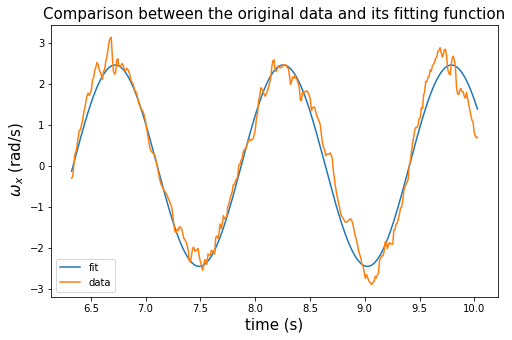

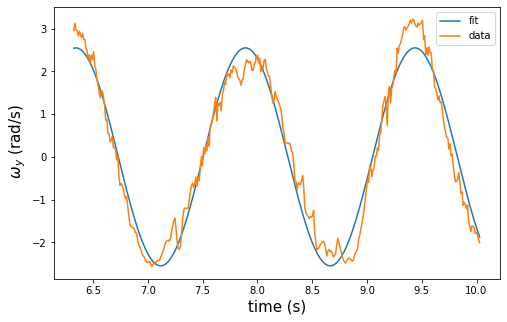

In [15]:
# plot the fitting functions
fit_x= para_x[0][0] * np.sin(para_x[0][1]*(time2+para_x[0][2]) + para_x[0][3])
fit_y= para_y[0][0] * np.sin(para_y[0][1]*(time2+para_y[0][2]) + para_y[0][3])


plt.figure(1)
plt.figure(figsize=(8,5))
plt.plot(time2,fit_x,label='fit')
plt.plot(time2,xdata2,label='data')
plt.xlabel('time (s)',fontsize=15)
plt.ylabel(r' $\omega_x$ (rad/s)',fontsize=15)
plt.legend(loc='best')
plt.title('Comparison between the original data and its fitting function',fontsize=15)


plt.figure(2)
plt.figure(figsize=(8,5))
plt.plot(time2,fit_y,label='fit')
plt.plot(time2,ydata2,label='data')
plt.xlabel('time (s)',fontsize=15)
plt.ylabel(r' $\omega_y$ (rad/s)',fontsize=15)
plt.legend(loc='best')

plt.show()

In [16]:
# compute chi square and variance
chi2x, varx= chi2(xdata2,fit_x,1)
chi2y, vary = chi2(ydata2,fit_y,1)
print(u'The \u03C7^2 of \u03C9_x fitting is: %1.4f '%(chi2x))
print(u'The \u03C7^2 of \u03C9_y fitting is: %1.4f '%(chi2y))

The χ^2 of ω_x fitting is: 38.1356 
The χ^2 of ω_y fitting is: 52.1928 


Shown in the above figures, the scipy algorithm fits the raw data successfully. While it seems scipy has larger $\chi^2$ values which is reasonable since the difficulty of the experiment operation affects measured data hence causes larger errors. To compare two algorithms more directly, we calculate the spin and precession angular velocities, based on fitting function parameters, to check how different the results are.

In [17]:
# compare spin and precession angular velocities
wspin1 = zfit2
wspin2 = (para_x[0][1]+para_y[0][1])/2
wpre1 = np.sqrt(absfit2**2-zfit2**2)
wpre2 = (para_x[0][0]+para_y[0][0])/2
print('The precession speed from our algorithm: %1.4f rad/s, while from scipy: %1.4f rad/s'%(wpre1,wpre2))
print('The spin speed from our algorithm: %1.4f rad/s, while from scipy: %1.4f rad/s'%(wspin1,wspin2))


The precession speed from our algorithm: 2.5418 rad/s, while from scipy: 2.5033 rad/s
The spin speed from our algorithm: 4.1824 rad/s, while from scipy: 4.0767 rad/s


The results from both algorithm are pretty much the same.